# Cryptography

Recall from the lectures:

> A cryptosystem is a 5-tuple (E,D,M,C,K) where
> * E is an encryption algorithm
> * D is a decryption algorithm
> * M is the set of plaintexts
> * C is the set of ciphertexts
> * K is the set of keys

> [Kerckhoffs’ principle](https://en.wikipedia.org/wiki/Kerckhoffs%27s_principle): do not rely on the secrecy of algorithms; the key should be the only secret that needs protection

> The strength of any cryptographic system rests with the key distribution technique

So, let's talk about keys.

## Keys and locks
The key to your home most likely opens a [tumbler lock](https://en.wikipedia.org/wiki/Pin_tumbler_lock#Design). Please take a close look at the figure: the grooves on a key are shaped to push the pins inside your lock so that they align precisely to allow the plug to rotate.

*A key contains the __information__* required to open a lock. In a tumbler lock key, this information is encoded in the depths of the grooves; the importance of the information content is even more evident in a [combination lock](https://en.wikipedia.org/wiki/Combination_lock), where the key is a secret knowledge that only you should know - assuming you changed the combination from the default setting - but can be copied by shoulder-surfing any time you open the lock.

The space of all possible keys opening a lock is the possible heights of all pins. An attacker can either try all possible keys (brute force), make a copy of your key (bypass copy protection), or steal your key.

**Exercise**: suppose a friend decides to prank you by placing a combination lock on your gym locker. The lock has three decimal dials (0-9), with a combination unknown to you. Assuming it takes you one second to change the current combination and try to open the lock, how long would it take to try every possible combination to get your stuff back? Would you pay your friend a €5 ransom to tell you what the key is, and save you the time? What if the lock had four dials, instead of three?

## Symmetric cryptography

A symmetric cipher uses the same key to encrypt and decrypt plaintext messages:

$
\begin{align*}
    E(k,p)=c \\
    D(k,c)=p
\end{align*}
$

A block cipher operates on blocks of a fixed length. If the plaintext is longer than the block length, a [mode of operation](https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation) specifies how the cipher is used to generate the final ciphertext - see NIST [SP 800-38A](https://csrc.nist.gov/publications/detail/sp/800-38a/final).

The current standard for symmetric block ciphers is [AES](https://en.wikipedia.org/wiki/Advanced_Encryption_Standard) - see NIST [FIPS 197](https://www.nist.gov/publications/advanced-encryption-standard-aes).

Let's look at some symmetric encryption examples with [cryptography.io](https://cryptography.io/en/latest/hazmat/primitives/symmetric-encryption/).

(42336, 3)


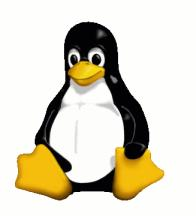

Plaintext length: 42336
Unpadded plaintext length: 1016064
Padded plaintext length: 1016080


OSError: cannot identify image file <_io.BytesIO object at 0x7f6a74e67ba0>

In [44]:
import os
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import requests
import IPython.display as Disp
import numpy
from PIL import Image
import matplotlib.pyplot as pplt
from io import BytesIO

backend = default_backend()

## generate a cryptographically secure random key
key = os.urandom(16)
cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=backend)
encryptor = cipher.encryptor()

url = 'https://upload.wikimedia.org/wikipedia/commons/5/56/Tux.jpg'
r = requests.get(url)
#img = Disp.Image(r.content)
#print('w: {0}, h: {1}'.format(img.width, img.height))

img = Image.open(BytesIO(r.content))
pixel_data = list(img.getdata())
a = numpy.array(pixel_data)
print(a.shape)
Disp.display(img)

print('Plaintext length: {0}'.format(len(pixel_data)))

padder = padding.PKCS7(128).padder()
p = padder.update(a.tobytes())
q = len(p)
print('Unpadded plaintext length: {0}'.format(q))
p += padder.finalize()
print('Padded plaintext length: {0}'.format(len(p)))
ct = encryptor.update(p) + encryptor.finalize()

c = numpy.frombuffer(ct[0:q], dtype=a.dtype)

#c.reshape(a.shape)

decryptor = cipher.decryptor()
padded_data = decryptor.update(ct) + decryptor.finalize()
unpadder = padding.PKCS7(128).unpadder()
d = unpadder.update(padded_data)
b = numpy.frombuffer(d, dtype=a.dtype)
b.reshape(a.shape)
bimg = Image.open(BytesIO(b.tobytes()))
Disp.display(Disp.Image(data=ct, format='png'))

Disp.display(Disp.Image(data=b, format='jpg'))

**Exercise**: try changing a single letter of the message, and verify that the ciphertext changes completely.

**Exercise**: Verify that the message digest if the length you expect from a [SHA-256](https://en.wikipedia.org/wiki/SHA-2) hash. Try changing the hash algorithm to one with a different digest length, e.g. [MD5](https://en.wikipedia.org/wiki/MD5).

# Links



# Theme
You can run the following cell to change the appearance of this notebook to suit your taste. Check for available themes on [github.com/dunovank/jupyter-themes](https://github.com/dunovank/jupyter-themes).

In [8]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')